<a href="https://colab.research.google.com/github/manpreet1325/cap-comp215/blob/main/midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP215 Mid-term Exam   Spring 2023

#### Score:  _________ / 25

##### Date:  Mar. 8, 2023

#### Student Name: Manpreet Kaur


## Instructions:
 - exam is open-book, open-internet, but must be completed individually (no communication, cooperations, or assistance)
 - complete the exercises in this notebook
 - for each exercise, write a piece of code that solves the problem and produces some output, or answer questions in the markdown block, as specified.

### Topics:
 - Data structures:  list, dictionary, class, graph, 1D array
 - Algorithms: graph traversal, matrix operators (numpy), sliding dot-product (correlation)
 - Techniques: list comprehension, generators, random numbers, plotting
 - Concepts: Big-O analysis of algorithm time complexity

As usual, we start with module imports...

In [188]:
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np

## Structured Data
The `exoplanets` data below was fetched from [NASA's Exoplanet Archive API](https://exoplanetarchive.ipac.caltech.edu/docs/API_queries.html) (only portion of data is shown here).
[https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,disc_year,disc_telescope+from+pscomppars&format=json]

It is a list of confirmed exoplanets, where each record provides the planet name `pl_name` and host star `hostname`, along with discovery year and telescope.

In [189]:
exoplanets = [
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1901',
  'pl_name': 'Kepler-1901 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1882',
  'pl_name': 'Kepler-1882 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1732',
  'pl_name': 'Kepler-1732 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-152',
  'pl_name': 'Kepler-152 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1526',
  'pl_name': 'Kepler-1526 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1475',
  'pl_name': 'Kepler-1475 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1863',
  'pl_name': 'Kepler-1863 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-954',
  'pl_name': 'Kepler-954 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-533',
  'pl_name': 'Kepler-533 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1559',
  'pl_name': 'Kepler-1559 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2019,
  'hostname': 'V1298 Tau',
  'pl_name': 'V1298 Tau d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'K2-34',
  'pl_name': 'K2-34 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-122',
  'pl_name': 'Kepler-122 f'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-413',
  'pl_name': 'Kepler-413 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-154',
  'pl_name': 'K2-154 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-885',
  'pl_name': 'Kepler-885 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-120',
  'pl_name': 'Kepler-120 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1878',
  'pl_name': 'Kepler-1878 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-324',
  'pl_name': 'Kepler-324 e'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'KIC 5437945',
  'pl_name': 'Kepler-460 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-473',
  'pl_name': 'Kepler-473 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-85',
  'pl_name': 'Kepler-85 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-32',
  'pl_name': 'Kepler-32 e'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2012,
  'hostname': 'GJ 3470',
  'pl_name': 'GJ 3470 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2013,
  'hostname': 'Kepler-66',
  'pl_name': 'Kepler-66 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-971',
  'pl_name': 'Kepler-971 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1432',
  'pl_name': 'Kepler-1432 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-953',
  'pl_name': 'Kepler-953 b'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2008,
  'hostname': 'HD 20868',
  'pl_name': 'HD 20868 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1365',
  'pl_name': 'Kepler-1365 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-903',
  'pl_name': 'Kepler-903 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'K2-347',
  'pl_name': 'K2-347 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2015,
  'hostname': 'Kepler-439',
  'pl_name': 'Kepler-439 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-810',
  'pl_name': 'Kepler-810 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-334',
  'pl_name': 'K2-334 b'},
 {'disc_telescope': '0.1 m TESS Telescope',
  'disc_year': 2022,
  'hostname': 'TOI-2184',
  'pl_name': 'TOI-2184 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-600',
  'pl_name': 'Kepler-600 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1161',
  'pl_name': 'Kepler-1161 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-543',
  'pl_name': 'Kepler-543 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1494',
  'pl_name': 'Kepler-1494 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1221',
  'pl_name': 'Kepler-1221 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-856',
  'pl_name': 'Kepler-856 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1340',
  'pl_name': 'Kepler-1340 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-266',
  'pl_name': 'K2-266 e'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1473',
  'pl_name': 'Kepler-1473 b'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2009,
  'hostname': 'HD 125595',
  'pl_name': 'HD 125595 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-173',
  'pl_name': 'Kepler-173 b'},
 {'disc_telescope': '0.1 m TESS Telescope',
  'disc_year': 2022,
  'hostname': 'TOI-1759',
  'pl_name': 'TOI-1759 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1853',
  'pl_name': 'Kepler-1853 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1083',
  'pl_name': 'Kepler-1083 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2022,
  'hostname': 'K2-384',
  'pl_name': 'K2-384 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'K2-46',
  'pl_name': 'K2-46 b'},
 {'disc_telescope': '0.1 m TESS Telescope',
  'disc_year': 2019,
  'hostname': 'TOI-125',
  'pl_name': 'TOI-125 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-262',
  'pl_name': 'Kepler-262 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1493',
  'pl_name': 'Kepler-1493 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2022,
  'hostname': 'K2-383',
  'pl_name': 'K2-383 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1156',
  'pl_name': 'Kepler-1156 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1593',
  'pl_name': 'Kepler-1593 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-769',
  'pl_name': 'Kepler-769 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-180',
  'pl_name': 'K2-180 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1001',
  'pl_name': 'Kepler-1001 b'},
 {'disc_telescope': '1.6 m wide-field telescope',
  'disc_year': 2019,
  'hostname': 'KMT-2017-BLG-1146L',
  'pl_name': 'KMT-2017-BLG-1146L b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-59',
  'pl_name': 'Kepler-59 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1339',
  'pl_name': 'Kepler-1339 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-116',
  'pl_name': 'Kepler-116 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1735',
  'pl_name': 'Kepler-1735 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1919',
  'pl_name': 'Kepler-1919 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-199',
  'pl_name': 'K2-199 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-30',
  'pl_name': 'Kepler-30 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1058',
  'pl_name': 'Kepler-1058 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-342',
  'pl_name': 'Kepler-342 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-178',
  'pl_name': 'Kepler-178 d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-300',
  'pl_name': 'Kepler-300 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-49',
  'pl_name': 'Kepler-49 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-285',
  'pl_name': 'Kepler-285 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1388',
  'pl_name': 'Kepler-1388 e'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2010,
  'hostname': 'HD 113538',
  'pl_name': 'HD 113538 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-921',
  'pl_name': 'Kepler-921 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-84',
  'pl_name': 'Kepler-84 d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-151',
  'pl_name': 'Kepler-151 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-484',
  'pl_name': 'Kepler-484 b'},
 {'disc_telescope': '0.1 m TESS Telescope',
  'disc_year': 2022,
  'hostname': 'TOI-4329',
  'pl_name': 'TOI-4329 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1224',
  'pl_name': 'Kepler-1224 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1630',
  'pl_name': 'Kepler-1630 b'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2021,
  'hostname': 'HD 93385',
  'pl_name': 'HD 93385 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2015,
  'hostname': 'KIC 5951458',
  'pl_name': 'KIC 5951458 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-688',
  'pl_name': 'Kepler-688 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1379',
  'pl_name': 'Kepler-1379 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2013,
  'hostname': 'KOI-351',
  'pl_name': 'KOI-351 d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1543',
  'pl_name': 'Kepler-1543 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1837',
  'pl_name': 'Kepler-1837 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-326',
  'pl_name': 'Kepler-326 d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'K2-26',
  'pl_name': 'K2-26 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1128',
  'pl_name': 'Kepler-1128 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-334',
  'pl_name': 'Kepler-334 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1448',
  'pl_name': 'Kepler-1448 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1350',
  'pl_name': 'Kepler-1350 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1770',
  'pl_name': 'Kepler-1770 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-401',
  'pl_name': 'Kepler-401 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-511',
  'pl_name': 'Kepler-511 c'}
]

### Q.1  (2 points)
Use a **list comprehension** to define a list of exoplanet `pl_names` discovered by the `0.1 m TESS Telescope`
*Hint*: there are 4 such planets in the list above.

In [190]:

pl_names_list= [i['pl_name'] for i in exoplanets if i['disc_telescope']== '0.1 m TESS Telescope']

pl_names_list

['TOI-2184 b', 'TOI-1759 b', 'TOI-125 b', 'TOI-4329 b']

### Q.2  (3 points)
Develop a `dict` with a count of the number of exoplanets discovered in each year.
There are *many* different ways to approach this - for full points solution should be concise and easy to understand.

*Tip*: the built-in [defaultdict(int)](https://docs.python.org/3/library/collections.html#collections.defaultdict) could help here.

In [191]:
from collections import defaultdict


exoplanet_counts = defaultdict(int)

#to count number of planets discovered in a given year
for exoplanet in exoplanets:
    year = exoplanet['disc_year']
    exoplanet_counts[year] += 1    # if the year already exists, adds 1 to its counts, otherwise adds the year.

exoplanet_counts_dict = dict(exoplanet_counts)

print(exoplanet_counts)
print(exoplanet_counts_dict)

defaultdict(<class 'int'>, {2021: 13, 2014: 16, 2016: 45, 2019: 3, 2018: 5, 2012: 6, 2013: 2, 2008: 1, 2015: 2, 2022: 5, 2009: 1, 2010: 1})
{2021: 13, 2014: 16, 2016: 45, 2019: 3, 2018: 5, 2012: 6, 2013: 2, 2008: 1, 2015: 2, 2022: 5, 2009: 1, 2010: 1}


### Q.3  (3 points)
Plot your discoveries-by-year data as a [matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) chart.
(no need to label axes or add a chart title)

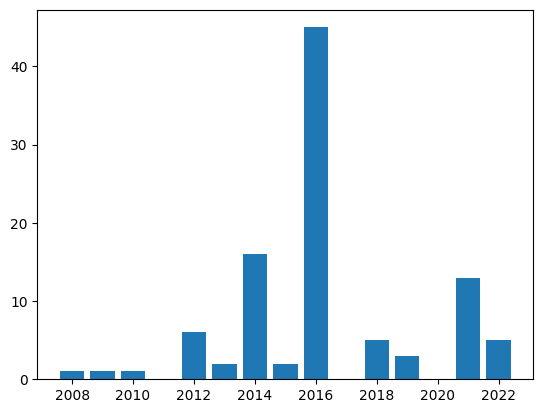

In [192]:

"""years = list(exoplanet_counts_dict.keys())
counts = list(exoplanet_counts_dict.values())"""
#for some reason, this was not working

years =[i for i in exoplanet_counts]
counts = [exoplanet_counts[year] for year in years]


plt.bar(years, counts)

plt.show()


## Data Classes
Develop a small class to represent a single exoplanet object.
You may use `@dataclass` or a regular class, as you wish.

Your class should define at least 2 methods:
```
  def __str__(self) : return a nicely formatted string with the exoplanet's name and its discovery year

  def has_same_host(self, other) : return True iff this exoplanet and the other share the same host
```

### Q.4   (5 points)
Write your class below and include some code to test it and both its methods.

In [193]:
class exoplanet:

  def __init__(self, name):
    self.name = name

    for i in exoplanets:
      if self.name == i['pl_name']:
        self.discovery_year= i['disc_year']
        self.host = i['hostname']


  def __str__(self):
    return f'The planet {self.name} was discoverevd in the year {self.discovery_year}'

  def has_same_host(self, other):
    return self.host == exoplanet(other).host

planet= exoplanet('Kepler-1770 b')


print(planet.__str__())

print(planet.has_same_host('K2-26 b'))

The planet Kepler-1770 b was discoverevd in the year 2021
False


## 1D Sliding Dot-product (correlation)
The array below represents the size (in sq. m) of each house along a given street.
In the questions below, we are trying to understand how each house compares to its next-door neighbours.

In [194]:
house_sizes = np.array( [251, 110, 92, 189, 215, 142, 126, 268, 243, 194] )
wrapped_sizes = np.pad(house_sizes, 1, mode='wrap')

### Q.5  (3 points)
Compute the average size of each house's 2 next-door neighbours using `np.correlate` [https://numpy.org/doc/stable/reference/generated/numpy.correlate.html](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html)
To avoid edge effects, we assume the last house is next-door to first house (a circular block)
  `wrapped_sizes` shows how to use `numpy.pad` to do this [https://numpy.org/devdocs/reference/generated/numpy.pad.html](https://numpy.org/devdocs/reference/generated/numpy.pad.html)

In [195]:

kernel = np.array([1, 1, 1])

#compute the sums of neighbors for each house
neighbor_sums = np.correlate(wrapped_sizes, kernel, mode='valid') - house_sizes

# Calculate the average size of each house's 2 next-door neighbors
average_neighbor_sizes = neighbor_sums / 2

print("average house sizes=" , average_neighbor_sizes)
for i, size in enumerate(average_neighbor_sizes):
    print(f"For house {i+1}, average neighbor size  is {size:.1f}")


average house sizes= [152.  171.5 149.5 153.5 165.5 170.5 205.  184.5 231.  247. ]
For house 1, average neighbor size  is 152.0
For house 2, average neighbor size  is 171.5
For house 3, average neighbor size  is 149.5
For house 4, average neighbor size  is 153.5
For house 5, average neighbor size  is 165.5
For house 6, average neighbor size  is 170.5
For house 7, average neighbor size  is 205.0
For house 8, average neighbor size  is 184.5
For house 9, average neighbor size  is 231.0
For house 10, average neighbor size  is 247.0


### Q.6  (2 points)
Compute the "variance" (difference) between each house's size and the average of it's neighbours.
For full points, you must do this using a vector operation rather than a loop or comprehension.
*Hint*: As a check on your work, the sum of all variances should be zero.

In [196]:
variances = house_sizes - average_neighbor_sizes


print("Variances between each house's size and average of neighbors:")
for i, variance in enumerate(variances):
    print(f"House {i+1}: Variance = {variance:.1f}")


print("Sum of variances:", np.sum(variances))

#Thus, we are getting 0 as the sum of variances

Variances between each house's size and average of neighbors:
House 1: Variance = 99.0
House 2: Variance = -61.5
House 3: Variance = -57.5
House 4: Variance = 35.5
House 5: Variance = 49.5
House 6: Variance = -28.5
House 7: Variance = -79.0
House 8: Variance = 83.5
House 9: Variance = 12.0
House 10: Variance = -53.0
Sum of variances: 0.0


## Graph Connectivity
Assume you have been tasked with writing an algorithm to determine if an undirected graph is connected:
```
   def is_connected(graph)
```
with this in mind, answer the following questions (*you need not actually write this function, its just for context*)...

### Q.7  (2 points)
 i) What is the smallest number of edges a connected undirected graph with $N$ nodes could have?
 ii) What is the largest number of edges a simple undirected graph with $N$ nodes could have? (no edges from a node to itself)



```
# This is formatted as code
```

Q.7 answer: A connected graph is the one in with every node is connected to atleast one other node such that there is a way to go from a node to any other node.
The smallest number of edges required for that is N-1.

2. The largest number of edges are present when we have a complete graph. For that, we need n(n-1)/2 edges.

### Q.8  (2 points)

Give an undirected graph with $N$ nodes and $M$ edges...
(i) what is the best-case time complexity for the `is_connected` algorithm?
(ii) what is the worst-case time complexity of the `is_connected` algorithm?

Choices:
 * $O(N)$
 * $O(M)$
 * $O(N + M)$
 * $O(N * M)$
 * $O(N^2)$
 * $O(2^N)$

Q.8 answer: Best-case= O(M), when the algorithm just needs check that there is not a way through all the nodes and there are just few edges.

Worst-case- O(N+M), when the algorithm goes to avery node and tries to find if there is a way to every other node going through every edge, when the graph is is complete or almost there.

## Iterable types

The code fragment below defines a list, a tuple and a generator, all containing the same sequence of values...

In [197]:
l = [(i-1, i, i+1) for i in range(10)]
t = tuple((i-1, i, i+1) for i in range(10))
g = ((i-1, i, i+1) for i in range(10))

type(l), type(t), type(g)


(list, tuple, generator)

### Q.9   (3 points)
Write a small piece of code that clearly demonstrates the principle difference(s) between these 3 iterable objects.

In [198]:
print("list=", l)
print("items")
for item in l:
    print(item)

print("\nTuple:", t)
print("items")
for item in t:
    print(item)

print("\nGenerator:", g)
print("\nitems")
for item in g:
    print(item)

print("\ndifferrence between tuple and list \n")
l= l+ [3]
print(l)

t= t+ (3)
print(t)

list= [(-1, 0, 1), (0, 1, 2), (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10)]
items
(-1, 0, 1)
(0, 1, 2)
(1, 2, 3)
(2, 3, 4)
(3, 4, 5)
(4, 5, 6)
(5, 6, 7)
(6, 7, 8)
(7, 8, 9)
(8, 9, 10)

Tuple: ((-1, 0, 1), (0, 1, 2), (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10))
items
(-1, 0, 1)
(0, 1, 2)
(1, 2, 3)
(2, 3, 4)
(3, 4, 5)
(4, 5, 6)
(5, 6, 7)
(6, 7, 8)
(7, 8, 9)
(8, 9, 10)

Generator: <generator object <genexpr> at 0x788633a8a810>

items
(-1, 0, 1)
(0, 1, 2)
(1, 2, 3)
(2, 3, 4)
(3, 4, 5)
(4, 5, 6)
(5, 6, 7)
(6, 7, 8)
(7, 8, 9)
(8, 9, 10)

differrence between tuple and list 

[(-1, 0, 1), (0, 1, 2), (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10), 3]


TypeError: ignored